# Instalando a biblioteca TA-Lib

Para instalar TA-lib siga o passo a passo descrito no link abaixo:
https://medium.com/@keng16302/how-to-install-ta-lib-in-python-on-window-9303eb003fbb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Instale a biblioteca TA-lib conforme documento
# Ex.: pip install TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl
import talib as ta

In [6]:
# Instale a biblioteca quandl
# pip install quandl
import quandl

In [7]:
# Importando dados
inicio = pd.to_datetime('2012-01-01')
fim = pd.to_datetime('2019-10-01')
aapl = quandl.get('WIKI/AAPL.11',start_date=inicio,end_date=fim)

In [17]:
aapl.tail()

,Adj. Close
Date,
2018-03-21,171.270
2018-03-22,168.845
2018-03-23,164.940
2018-03-26,172.770
2018-03-27,168.340


In [46]:
# Criando os indicadores
preco = aapl['2017-01-01':]['Adj. Close']
sup, med, inf = ta.BBANDS(preco, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
rsi = ta.RSI(preco, timeperiod=14)

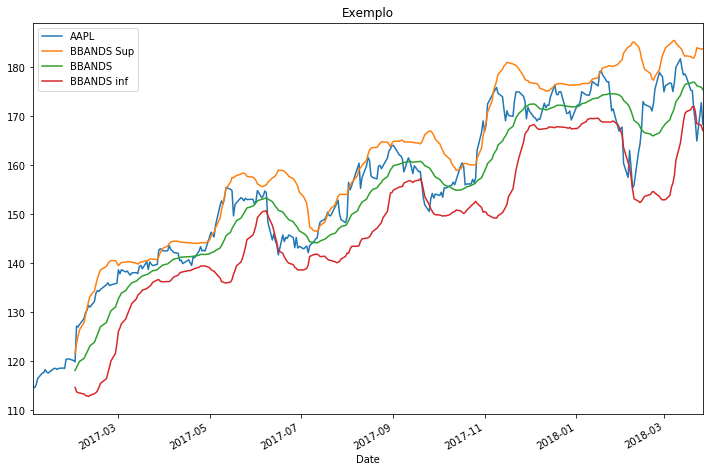

In [47]:
preco.plot(label='AAPL', title='Exemplo', figsize=(12,8))
sup.plot(label='BBANDS Sup')
med.plot(label='BBANDS')
inf.plot(label='BBANDS inf')
plt.legend()

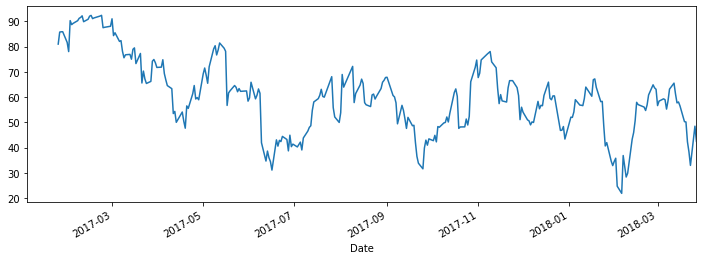

In [48]:
rsi.plot(label='RSI', figsize=(12,4))

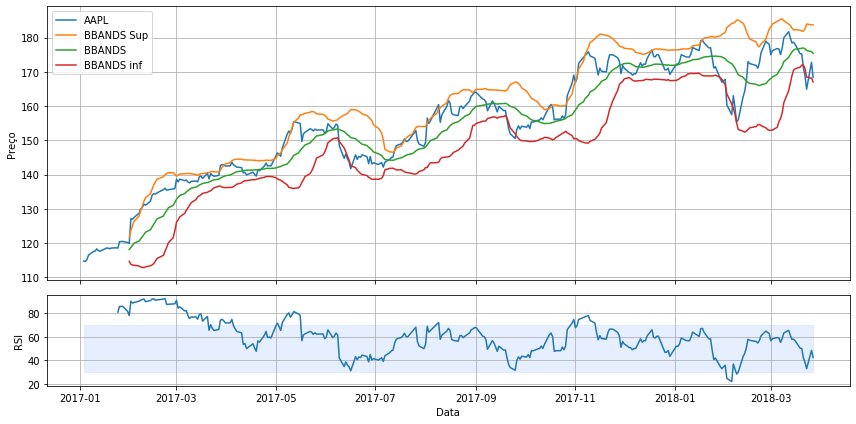

In [62]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 1]})

ax0.plot(preco, label='AAPL')
ax0.plot(sup, label='BBANDS Sup')
ax0.plot(med, label='BBANDS')
ax0.plot(inf, label='BBANDS inf')
ax0.set_ylabel('Preço')
ax0.grid()
ax0.legend()

ax1.plot(rsi, label='RSI')
ax1.fill_between(x=preco.index, y1=30, y2=70, color='#adccff', alpha='0.3')
ax1.set_xlabel('Data')
ax1.set_ylabel('RSI')
ax1.grid()

fig.tight_layout()
plt.show()